In [1]:
# TODO rerwrite this notebook to tests 

# Import Packages ###

import tensorflow as tf
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
from scipy.ndimage.filters import gaussian_filter
from scipy import ndimage
import logging 
from IPython import display
from time import time

# TODO also set in internal packages? 
# np.random.seed(1234)

# logger = logging.getLogger()
# logger.setLevel(logging.DEBUG)

# logger.debug("sdsd")

pylab.rcParams['figure.figsize'] = (10.0, 8.0)

print("\nSuccessfully imported external packages.")


# Get path to the libraries
importPath = os.path.abspath(os.path.join('..'))
sys.path.append(importPath)
print('\nPath to modules:' + importPath)

# Import internal libraries
import setting.experimentSetting as Setting
import model.unet as unet
import model.train as train
import visualization.visualUtils as visual
import data.dataProvider as dataProvider
from session import modelSaver, sessionManager

print("\nSuccessfully imported internal packages.\n")

Populating the interactive namespace from numpy and matplotlib

Successfully imported external packages.

Path to modules:/home/marek/CMP/drosophila/unet_tensorflow


/usr/local/lib/python2.7/dist-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


ImportError: No module named session

Successfully loaded 75 images.
Successfully created 10 image tiles.

Sample images:

X: top-left: 0.0149253727868, min-val: 0.0, max-val: 1.0 
Y: top-left: 2.0, min-val: 0.0, max-val: 2.0 
W: top-left: 0.0, min-val: 0.0, max-val: 5.90503835678 


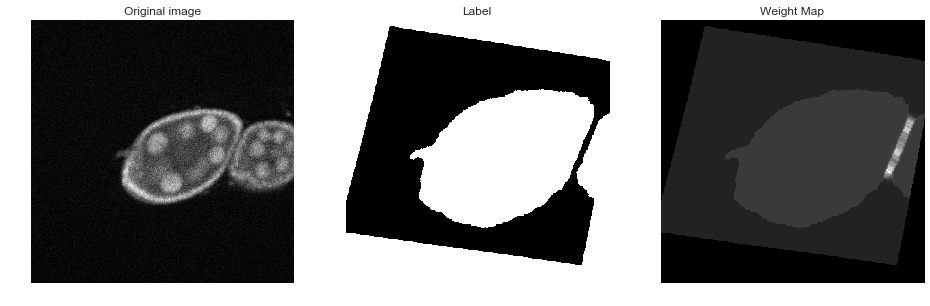

X: top-left: 0.00630252109841, min-val: 0.0, max-val: 0.928571403027 
Y: top-left: 2.0, min-val: 0.0, max-val: 2.0 
W: top-left: 0.0, min-val: 0.0, max-val: 11.0907115936 


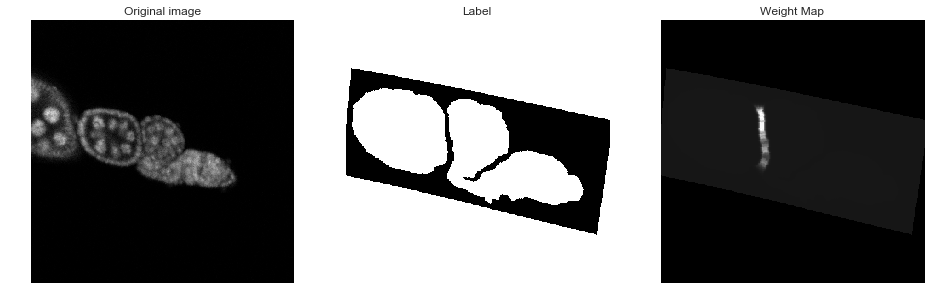

X: top-left: 0.0171673819423, min-val: 0.0, max-val: 1.0 
Y: top-left: 2.0, min-val: 0.0, max-val: 2.0 
W: top-left: 0.0, min-val: 0.0, max-val: 6.5546169281 


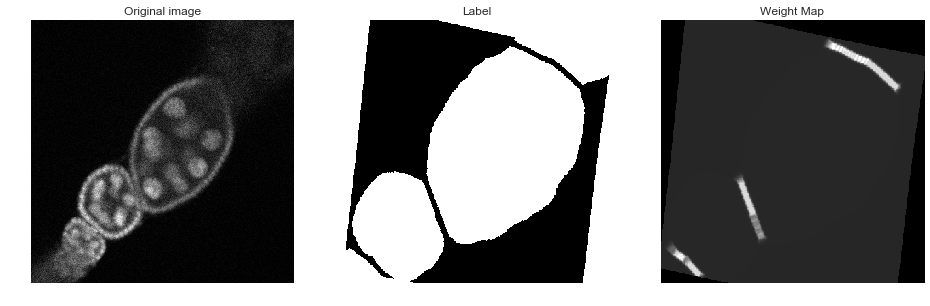

In [2]:
### Test: Create the input data ### 

# Get the transformed images as CNN input and output values
X, Y, W = dataProvider.create_batch()


# TODO print number of imported images etc
print("Successfully created {} image tiles.\n".format(len(X)))

PRINT_SAMPLE_TILES = True

if PRINT_SAMPLE_TILES:
    # TODO optionally plot sample of loaded images & labels
    print("Sample images:\n")
    
    pylab.rcParams['figure.figsize'] = (16.0, 8.0)
    interpolation = 'nearest'

    for i in range(3):

        f, axarr = plt.subplots(1, 3)
        
        # Debugging messages:
        print('X: top-left: {}, min-val: {}, max-val: {} '.format(X[i,0,0], np.min(X[i,:,:]), np.max(X[i,:,:])))
        print('Y: top-left: {}, min-val: {}, max-val: {} '.format(Y[i,0,0,1], np.min(Y[i,:,:,1]), np.max(Y[i,:,:,1])))
        print('W: top-left: {}, min-val: {}, max-val: {} '.format(W[i,0,0,1], np.min(W[i,:,:,1]), np.max(W[i,:,:,1])))

        
        axarr[0].imshow(X[i,:,:], cmap=plt.cm.gray, vmin=0, vmax=1, interpolation=interpolation) # 
        axarr[0].set_axis_off()
        axarr[0].set_title("Original image")

        axarr[1].imshow(Y[i,:,:,1], cmap=plt.cm.gray, vmin=0, vmax=1,  interpolation=interpolation) # 
        axarr[1].set_axis_off()
        axarr[1].set_title("Label")

        axarr[2].imshow(W[i,:,:,1], cmap=plt.cm.gray, interpolation=interpolation) # 
        axarr[2].set_axis_off()
        axarr[2].set_title("Weight Map")

        plt.show()

#         plt.contour(Y[i,:,:,1], colors='black', linewidths=6)


# plot histogram of weights 
#plt.hist(W.flatten(), bins=linspace(0, 30, 100))

In [7]:
### Test: Create the input data - Multithreading ### 

from data import MTDataProvider

sess = tf.Session()

print('Starting QueueRunner')
dequeue_imput_data_op, coord, enqueue_threads = MTDataProvider.create_and_start_inputDataQueueRunner(sess)

# Run the loop, controlling termination with the coordinator.
for step in xrange(5):
    if coord.should_stop():
        break

    # Get the data 
    print('Getting data')
    X_, Y_, W_ = dequeue_imput_data_op

    # Evaluate 
    print('Evaluating')
    X, Y, W = sess.run([X_, Y_, W_])

print('End of the loop')    
    
# When done, ask the threads to stop.
coord.request_stop()

# And wait for them to actually do it.
coord.join(enqueue_threads)

sess.close()
    
    
# Get the transformed images as CNN input and output values
# X, Y, W = dataProvider.create_batch()


# TODO print number of imported images etc
print("Successfully created {} image tiles.\n".format(len(X)))

PRINT_SAMPLE_TILES = True

if PRINT_SAMPLE_TILES:
    # TODO optionally plot sample of loaded images & labels
    print("Sample images:\n")
    
    pylab.rcParams['figure.figsize'] = (16.0, 8.0)
    interpolation = 'nearest'

    for i in range(3):

        f, axarr = plt.subplots(1, 3)
        
        # Debugging messages:
        print('X: top-left: {}, min-val: {}, max-val: {} '.format(X[i,0,0], np.min(X[i,:,:]), np.max(X[i,:,:])))
        print('Y: top-left: {}, min-val: {}, max-val: {} '.format(Y[i,0,0,1], np.min(Y[i,:,:,1]), np.max(Y[i,:,:,1])))
        print('W: top-left: {}, min-val: {}, max-val: {} '.format(W[i,0,0,1], np.min(W[i,:,:,1]), np.max(W[i,:,:,1])))

        
        axarr[0].imshow(X[i,:,:], cmap=plt.cm.gray, vmin=0, vmax=1, interpolation=interpolation) # 
        axarr[0].set_axis_off()
        axarr[0].set_title("Original image")

        axarr[1].imshow(Y[i,:,:,1], cmap=plt.cm.gray, vmin=0, vmax=1,  interpolation=interpolation) # 
        axarr[1].set_axis_off()
        axarr[1].set_title("Label")

        axarr[2].imshow(W[i,:,:,1], cmap=plt.cm.gray, interpolation=interpolation) # 
        axarr[2].set_axis_off()
        axarr[2].set_title("Weight Map")

        plt.show()

#         plt.contour(Y[i,:,:,1], colors='black', linewidths=6)


# plot histogram of weights 
#plt.hist(W.flatten(), bins=linspace(0, 30, 100))

Starting QueueRunner
Getting data
Evaluating
Creating new batch.
Creating new batch.
Getting data
Evaluating
Creating new batch.


KeyboardInterrupt: 

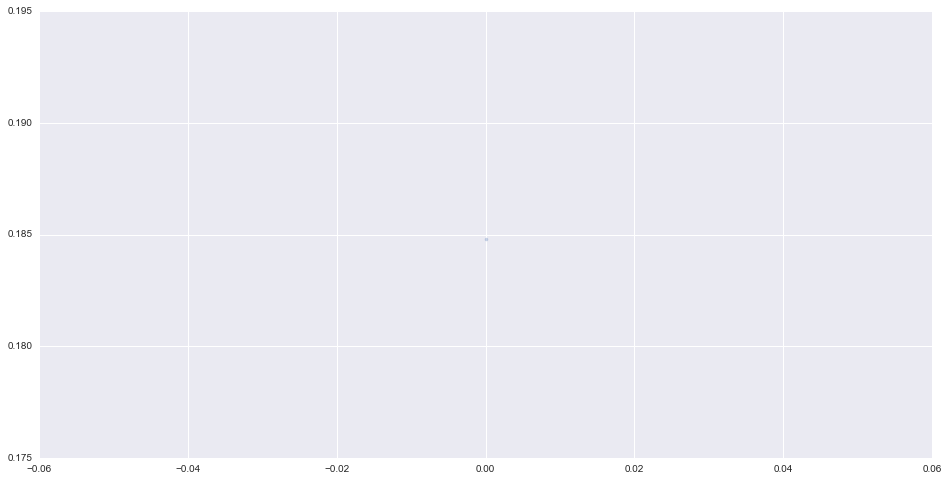

Error: 0.184813886881 
Trainig NN: Iteration [ 0.]


KeyboardInterrupt: 

In [3]:
### Train U-Net on generated augmented data ###

# Set model name that will be loaded 
# Setting.experiment_name = 'test26'

Setting.trained_models_dir = '../tmp/'

# Create TensorFlow session with initialized variables.
sess, nn, iteration, errorOverTime = sessionManager.create_session_with_init_variables()

# TODO also store training error --> it should be also TF variable 
# TODO cell it too large --> improve structure 

# errorOverTime = []
fig,ax = plt.subplots(1,1)

# Period of computing error & updating graph
EVAL_PERIOD = 10 # (EVAL_PERIOD = 1  ~ most accurate graph, but slower(?))

GENERATE_NEW_DATA_PERIOD = 1

SAVE_PERIOD = 10

# TODO show proper iteration when a stored NN is loaded 
# TODO remove local iteration "i"? and use "while"? 

for i in range(Setting.max_train_steps):
    
    # Iteration (considering the previous runs) 
    totalIteration = sess.run(iteration)
    
    # TODO optimize or run in separate thread - now it requires time comparable to train iteration
    # Generate new data
    if i % GENERATE_NEW_DATA_PERIOD == 0:
        t = time()
        X, Y, W = dataProvider.create_batch()
        print("Creating Batch - Duration: {}s".format(round(time() - t,3)))
        
    # Compute error on X,Y & update graph
    if i % EVAL_PERIOD == 0:
        # Compute error 
        # (Note on the error computing: X,Y are augmented data, it is unlikely that the same data were 
        # already used for training, however the dame data (just with different transformation) might 
        # have been already used for training) 
        t = time()
        
        # for Y values outside [0,1] weights must be 0
        assert np.min(Y * W) >= 0
        assert np.min((1-Y) * W) >= 0
        
        error = train.compute_error(nn, X, Y, W)
        print("Compute Error - Duration: {}s".format(round(time() - t,3)))
        
        # append the most recet error 
        #errorOverTime = tf.concat(0, [errorOverTime, [[float(totalIteration), error]]])
        # append the most recet error 
        op = tf.assign(
            errorOverTime,
            tf.concat(0, [errorOverTime, [[float(totalIteration), error]] ]), 
            validate_shape=False
            )
        sess.run(op)

        # Clear display
        display.clear_output(wait=True)

        # Update graph
        errorOverTimeList = sess.run(errorOverTime) 
        #print("errorOverTimeList {}".format(errorOverTimeList))
        
        if len(errorOverTimeList) >= 2:
#             visual.plotError(errorOverTimeList[:,1])
#             visual.plotError2(errorOverTimeList)
            visual.plotError2(errorOverTimeList[1:,:])
            plt.show()

        print("Error: {} ".format(error))
        
    ### Update & Print iteration    
    
    # Print the current iteration 
    iterationInThisRunText = '' 
    if totalIteration != i:
        # Case when we continue to train previously trained NN 
        iterationInThisRunText = " (iteration in the current run {})".format(i)
    
    print("Trainig NN: Iteration {}".format(totalIteration) + iterationInThisRunText)
        
    # Train on X,Y
    t = time()
    train.train_iteration(nn, totalIteration, X, Y, W)
    print("Train Iteration - Duration: {}s".format(round(time() - t,3)))
    
    
    if i % SAVE_PERIOD == 0:
        saver.save(sess, nnPath)
    
    # TODO is there a better approach? 
    iteration.assign(iteration + 1).op.run()

Creating new batch.
U-Net Segmentation vs. Ground Truth


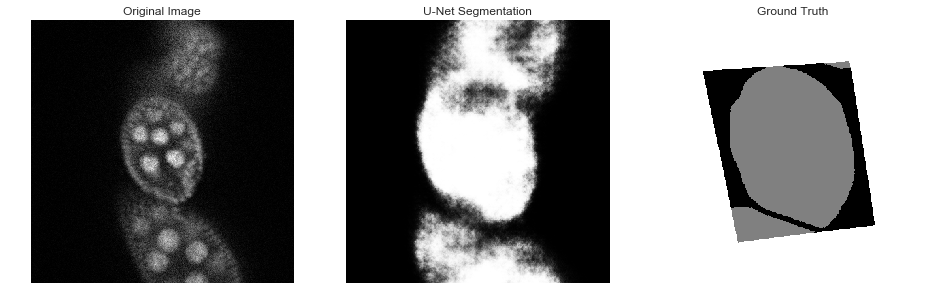

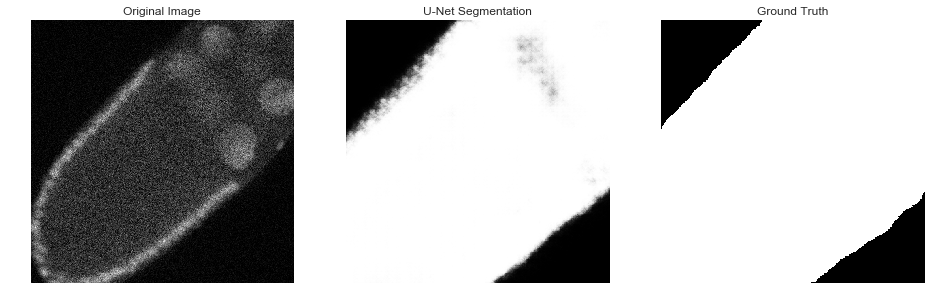

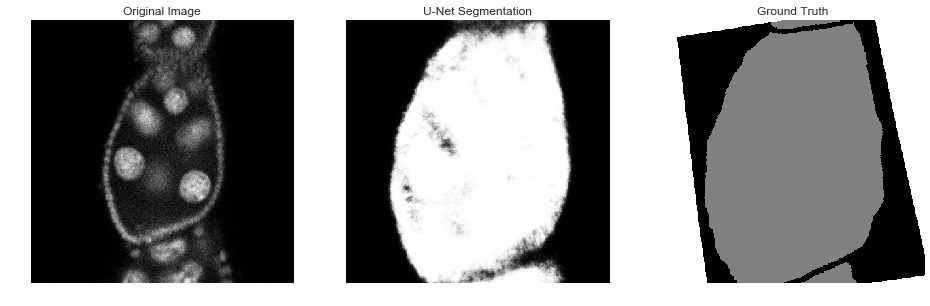

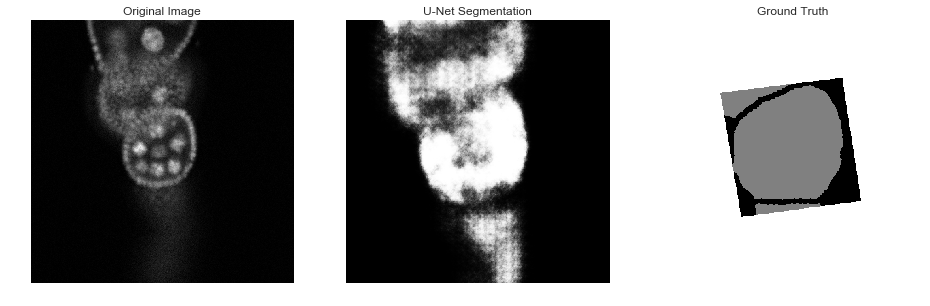

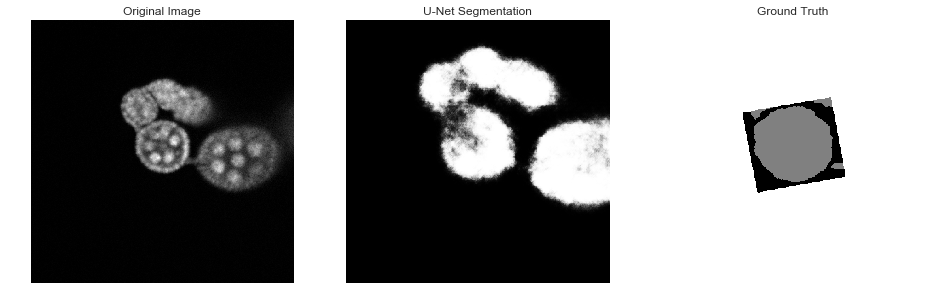

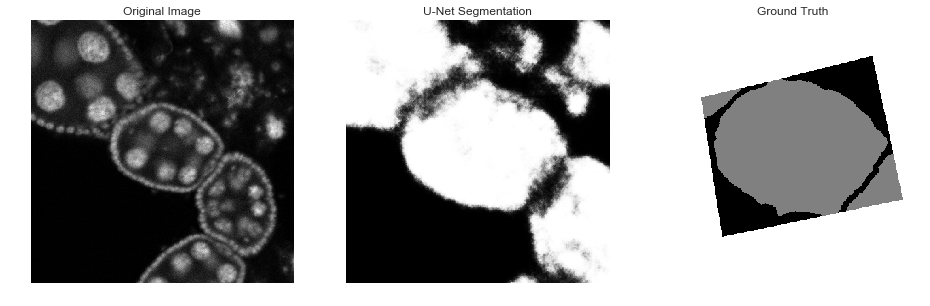

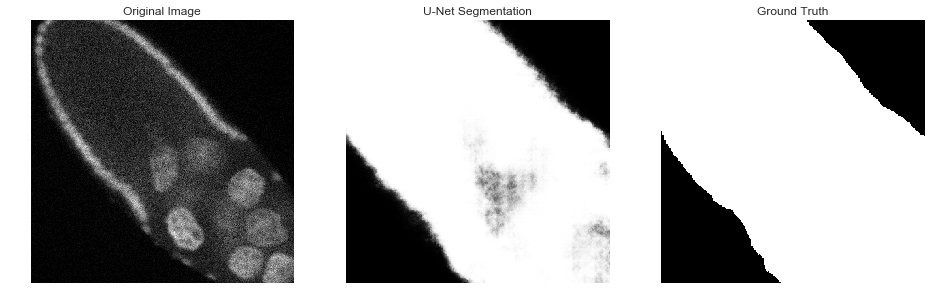

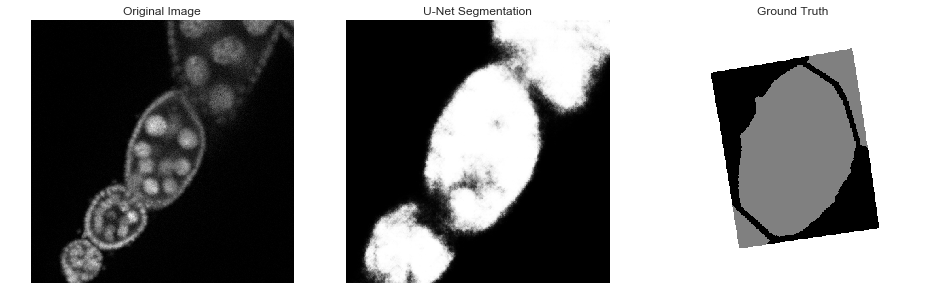

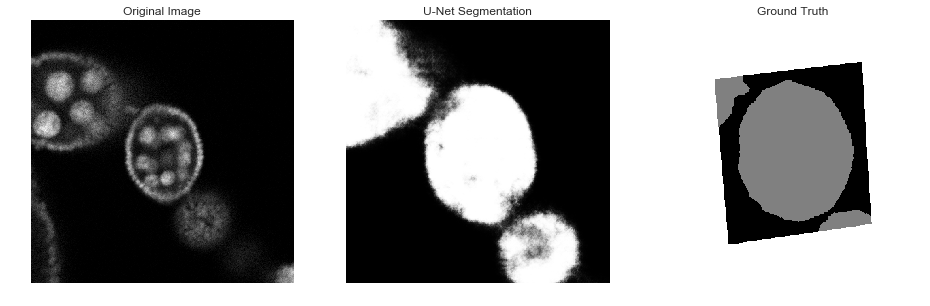

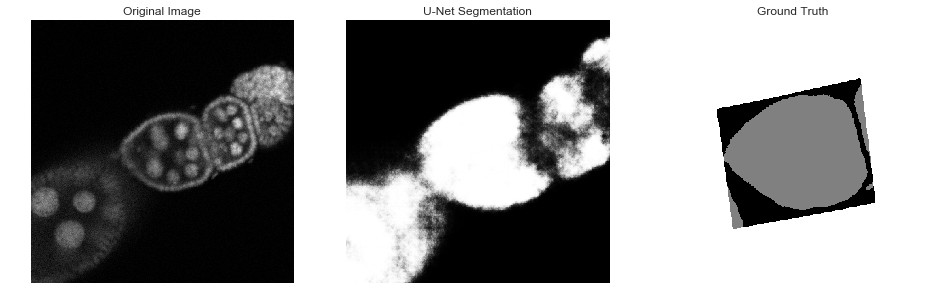

In [4]:
###  ### 

# TODO load trained network and: 
#  1) compate grand truth with the network output on generated images (use code from the existing impl. )
#  2) also investigate hidden layers

# Generate new data
# TODO the same input images are always used
X, Y, _ = dataProvider.create_batch()

# Get the placeholders for the input and output layer
x = nn.input[0]
output_map = nn.output[0]

# Get the placeholder for grandtrue
y_ = nn.y_

# Compute NN Output
result = output_map.eval(feed_dict={x:X, y_: Y, nn.keep_prob:1.0})

import seaborn as sns
sns.set_style("white")

# print('U-Net Segmentation')
# plt.subplot(111)
# plt.imshow(result[imNum,:,:,1],interpolation='none')  # , aspect=0.5
# plt.show()

# # print('Ground Truth')
# plt.subplot(112)
# plt.imshow(Y[imNum,:,:,1],interpolation='none')
# plt.show()

print('U-Net Segmentation vs. Ground Truth')

pylab.rcParams['figure.figsize'] = (16.0, 8.0)

for imNum in range(Setting.n_image):

    f, axarr = plt.subplots(1, 3)

    # No interpolation at all, i.e. without try to interpolate betwen pixels if the display resolution 
    # is not the same as the image resolution (which is most often the case). 
    # It will results in an image in which is image pixel is displayed as a square of multiple display pixels.
    # (see: http://stackoverflow.com/questions/12473511/what-does-matplotlib-imshowinterpolation-nearest-do )
    interpolation = 'nearest'
    # This actually does some interpolation (if the display resolution  != the picture resolution) 
    # interpolation = 'none'

    axarr[0].imshow(X[imNum,:,:], cmap=plt.cm.gray, interpolation=interpolation) # 
    axarr[0].set_axis_off()
    axarr[0].set_title("Original Image")
    
    axarr[1].imshow(result[imNum,:,:,1], cmap=plt.cm.gray, interpolation=interpolation) # 
    axarr[1].set_axis_off()
    axarr[1].set_title("U-Net Segmentation")

    axarr[2].imshow(Y[imNum,:,:,1], cmap = plt.cm.gray, interpolation=interpolation) # 
    axarr[2].set_axis_off()
    axarr[2].set_title("Ground Truth")

    # plt.tight_layout()
    plt.show()


# print(nn.dice_.eval(feed_dict={x:X, y_: Y,nn.keep_prob:1.0}))

# TODO investigate strange (white) grid in segmented image 
#      --> possible cause: label in "incorrect" format